### 다양한 데이터 변환 - PCA, NMF, LDA 등
 * MNIST 데이터 셋을 활용한 데이터 변환

### 학습 내용
 * 데이터 및 라이브러리 준비
 * PCA

### 데이터 및 라이브러리 준비

In [1]:
# ---------------------------------
# 데이터 등 준비
# ----------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [3]:
# keras.datasets을 이용하여 데이터 셋 다운로드
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# 2차원 데이터로 수행
train_x = train_x.reshape(train_x.shape[0], -1)

# 상위 1000건으로 축소
train_x = pd.DataFrame(train_x[:1000, :])
train_y = train_y[:1000]

### PCA

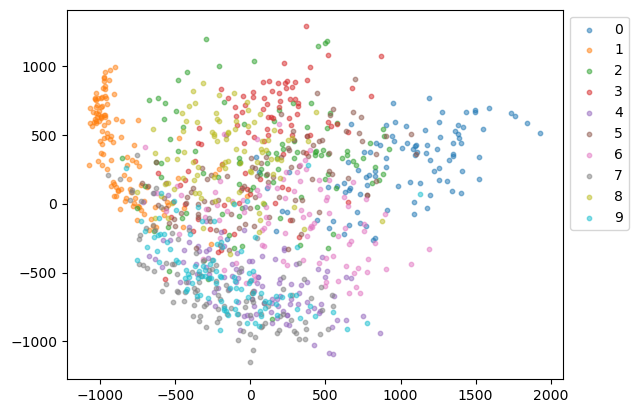

In [5]:
# -----------------------------------
# PCA
# -----------------------------------
from sklearn.decomposition import PCA

# 학습 데이터를 기반으로 PCA에 의한 변환을 정의
pca = PCA()
x_pca = pca.fit_transform(train_x)

# 클래스 별로 색깔을 나누어 2차원으로 플롯
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

### LDA (Linear Discriminant Analysis)

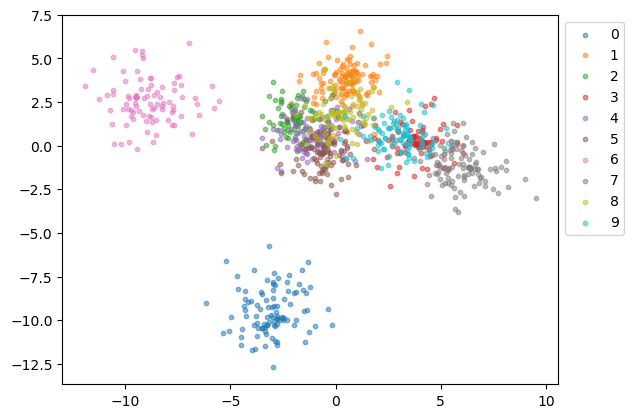

In [6]:
# -----------------------------------
# LDA (Linear Discriminant Analysis)
# -----------------------------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 클래스별로 가장 잘 나누는 2축을 선형 판별 분석으로 도출
lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

# 클래스별로 색깔을 나누어 2차원으로 플롯
# 잘 분할되어 있으나 목적변수를 이용하고 있어 다른 곳에 비해 매우 유리한 조건임에 주의
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

### t-sne

C:\Users\daniel_wj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\daniel_wj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


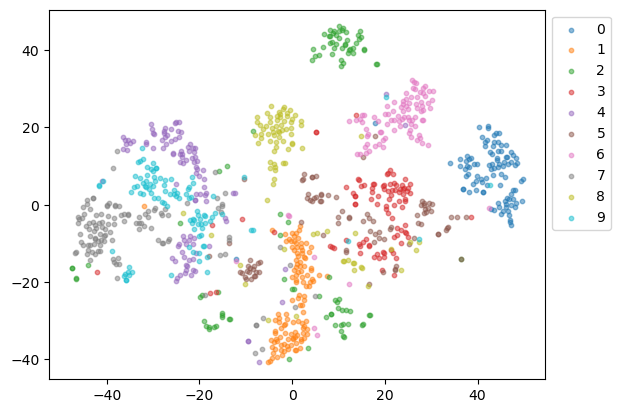

In [7]:
# -----------------------------------
# t-sne
# -----------------------------------
from sklearn.manifold import TSNE

# t-sne에 의한 변환
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

# 클래스별로 색깔을 나누어 2차원으로 플롯
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

### UMAP
 * 23/06 코드 실행 결과 에러 발생. 추후 확인 필요.

In [9]:
# -----------------------------------
# UMAP
# -----------------------------------
# 에러 발생시 : No module named 'umap'
# pip install umap-learn
import umap

# UMAP에 의한 변환
um = umap.UMAP()
x_umap = um.fit_transform(train_x)

# 클래스별로 색깔을 나누어 2차원으로 플롯
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

AttributeError: module 'umap' has no attribute 'UMAP'